## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [4]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [6]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

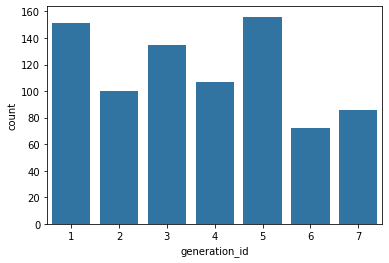

In [8]:
base_color = sb.color_palette()[0]

sb.countplot(data=pokemon, x='generation_id', color=base_color);

### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [9]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [10]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

In [13]:
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [14]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [15]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

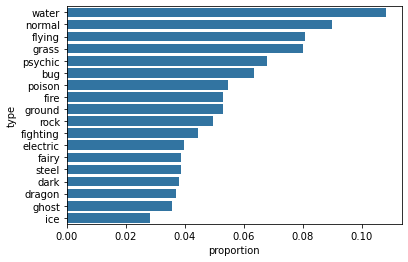

In [16]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

### Additional Variation

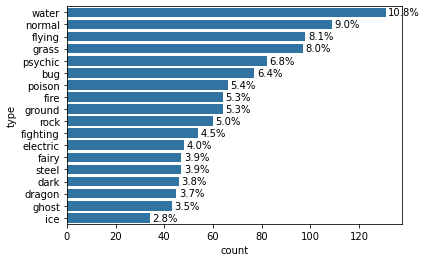

In [18]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center');

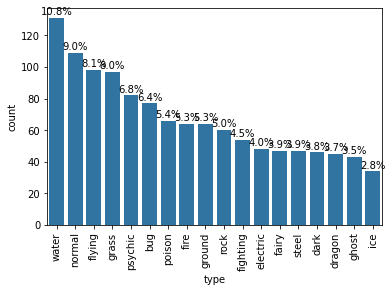

In [20]:
# Vertical plot
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);

# get the current tick locations and labels
locs, lables = plt.xticks(rotation=90)

# loop through each pair for the label to get the correct count
for loc, label in zip(locs, lables):
    
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:.1f}%'.format(100*count/n_pokemon)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black')

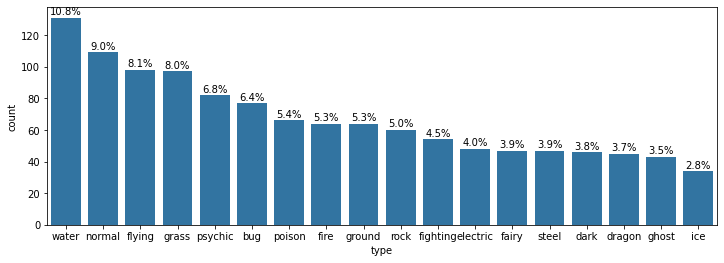

In [24]:
from matplotlib import rcParams

# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(i, count+2, pct_string, ha='center');